In [138]:
# Configure matplotlib.
%matplotlib inline

# Unclutter the display.
import pandas as pd
import geopandas as gpd
import geoplot as gplt

import geoplot.crs as gcrs

pd.set_option('max_columns', 6)

eqs_data = gpd.read_file('../data/raw_geojson.json')
map_data = gpd.read_file('../data/nepal_local.geojson')

nepal_data = eqs_data.query("place.str.contains('Nepal') & mag > 4", engine='python')

<GeoAxesSubplot:>

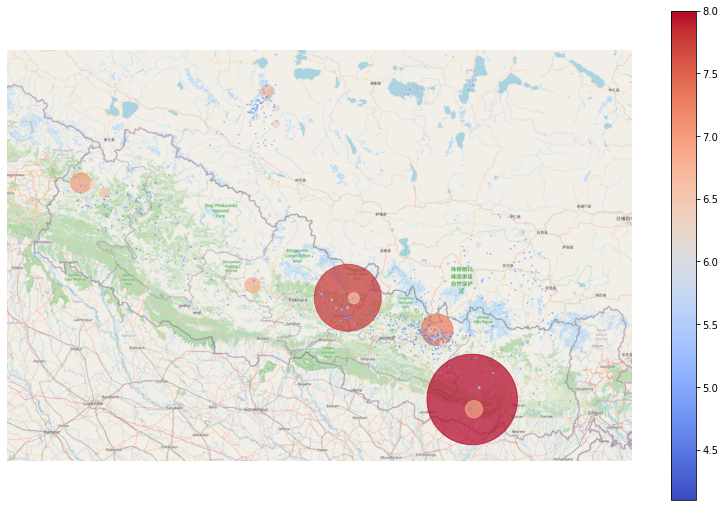

In [145]:
def log_scale(minval, maxval):
    return lambda val: 4.5**(val-minval)/(maxval-minval)

ax = gplt.webmap(map_data, projection=gcrs.WebMercator(), figsize=(14,9))

gplt.pointplot(nepal_data,hue='mag', scale='mag',
    scale_func=log_scale, limits=(4,8),
    ax=ax, alpha = 0.7, cmap='coolwarm',
    legend=True, legend_var='hue')